TASK 4

Analyze and visualize sentiment patterns in social media 
data to understand public opinion and attitudes towards
specific topics or brands.

The datasets contain tweets, which are those short messages people post on Twitter. Each tweet is tied to a specific topic or brand, and someone has already labeled the sentiment behind each tweet—whether it's positive, negative, or neutral.
The data set contains column variables like id, brand, orginal sentiment and text.

In [1]:
# Required Libraries
!pip install pandas numpy matplotlib seaborn wordcloud nltk

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download NLTK resources
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 325.1 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/300.2 kB 573.4 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 654.9 kB/s eta 0:00:01
   -------------------------------- ------- 245.8/300.2 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 881.2 kB/s eta 0:00:00


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hari\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hari\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hari\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [4]:
# Load the data
train_df = pd.read_csv('C:/Users/Hari/Desktop/Prodigy Infotech/TASK4/twitter_training.csv')
validation_df = pd.read_csv('C:/Users/Hari/Desktop/Prodigy Infotech/TASK4/twitter_validation.csv')

In [9]:
# Assign headers to the columns
train_df.columns = ['ID', 'Topic', 'Original_Sentiment', 'Text']
validation_df.columns = ['ID', 'Topic', 'Original_Sentiment', 'Text']

In [10]:
# Concatenate training and validation data
df = pd.concat([train_df, validation_df], ignore_index=True)

# Display the first few rows of the dataset
df.head()


,ID,Topic,Original_Sentiment,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [13]:

# Concatenate training and validation data
df = pd.concat([train_df, validation_df], ignore_index=True)

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment
def get_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] > 0.05:
        return 'positive'
    elif score['compound'] < -0.05:
        return 'negative'
    else:
        return 'neutral'

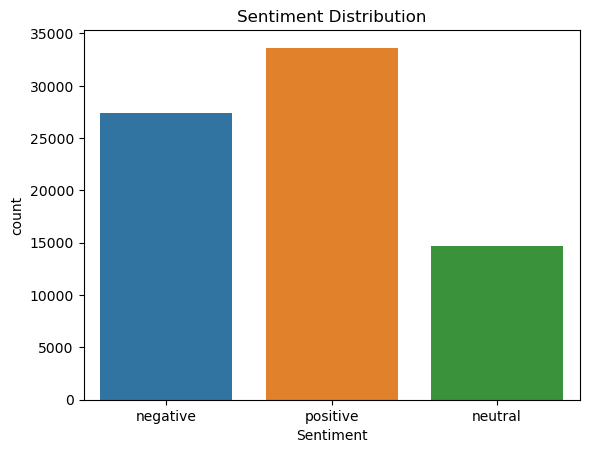

In [15]:
# Ensure that the Text column contains only strings
df['Text'] = df['Text'].astype(str)

# Handle any potential NaN values or non-string entries
df['Text'] = df['Text'].replace('nan', '')

# Apply sentiment analysis
df['Sentiment'] = df['Text'].apply(get_sentiment)

# Display the sentiment distribution
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()


The bar chart shows that the largest number of tweets in the dataset express positive sentiment, meaning people generally share more positive opinions or experiences about the topics or brands discussed. However, there is also a substantial number of negative tweets, indicating that a significant portion of the public has critical or unfavorable opinions. The neutral sentiment is the least common, suggesting that people are less likely to share neutral or indifferent opinions on social media. This might also indicate that the topics or brands tend to evoke stronger emotions, either positive or negative.

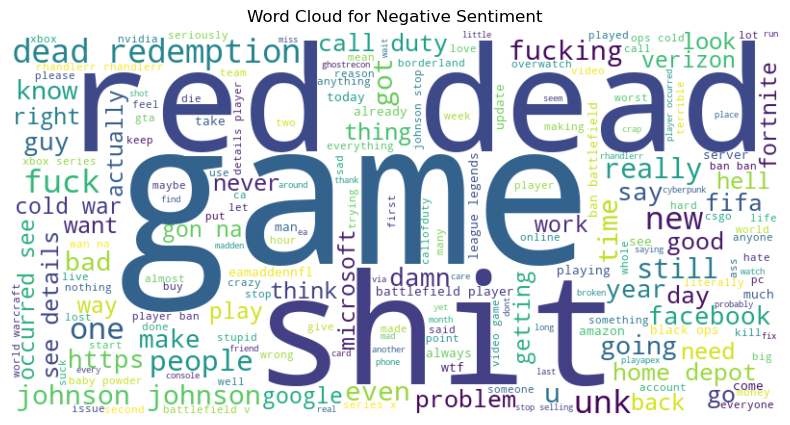

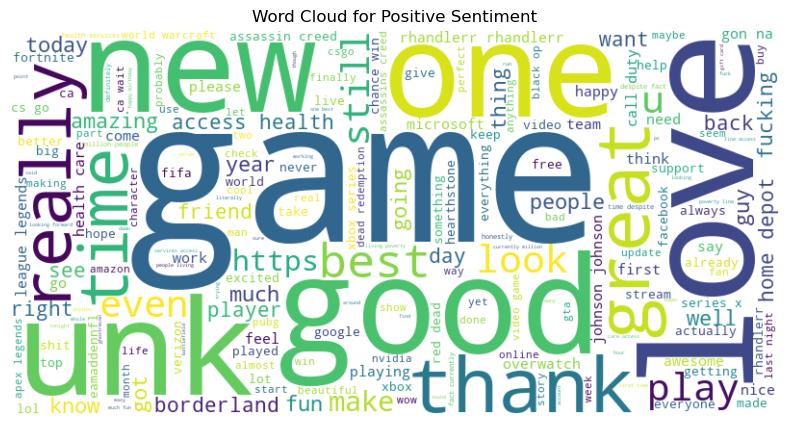

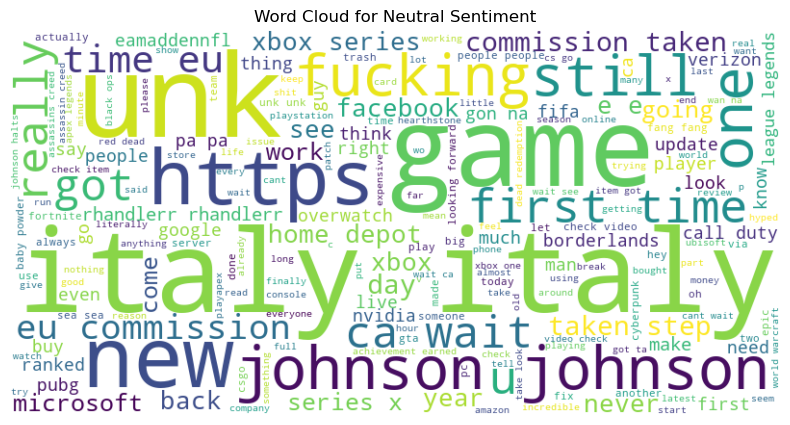

In [17]:
# Function to preprocess text for word cloud
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]  # Remove punctuation and lowercase
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Preprocess text
df['clean_text'] = df['Text'].apply(preprocess_text)

# Generate word cloud for each sentiment
for sentiment in df['Sentiment'].unique():
    text = " ".join(review for review in df[df['Sentiment'] == sentiment].clean_text)
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiment')
    plt.show()

The word clouds offer a clear visualization of the most frequently used words in tweets with both negative and positive sentiments. In the negative sentiment cloud, words like "dead," "game," "shit," and "fuck" stand out, reflecting strong negative emotions. Mentions of "Red Dead Redemption," "Cold War," "problem," and "issue" highlight dissatisfaction with specific games or products. The language in these tweets is more aggressive and frustrated, with terms like "never," "bad," "wrong," and "fail" showing clear discontent.

On the other hand, the positive sentiment cloud emphasizes words like "game," "good," "love," "new," and "thank," which reflect satisfaction and enjoyment. Positive expressions such as "love," "great," "best," and "amazing" dominate, indicating happiness or contentment with the topics or brands being discussed. Despite the differing sentiments, it's interesting to note that words like "game," "new," and "time" appear in both clouds, suggesting that while people discuss the same topics, their feelings about them can vary significantly.

The context in which these words are used plays a crucial role, as the same word can appear in both positive and negative contexts, with the surrounding language and sentiment score shaping the overall mood of the tweet. Overall, these word clouds align with the sentiment distribution, where positive sentiments are more common, but there’s also a significant presence of negativity, especially regarding frustration with specific issues or products. These visualizations provide valuable insights into the common themes and emotional tone behind public opinions on Twitter, helping us understand how certain topics or brands are perceived.